In [1]:
# Load packages
import pandas as pd  # To read data
import csv # Saving and reading data
import numpy as np # Used in linear regression
import matplotlib.pyplot as plt  # To visualise
from matplotlib.pylab import rcParams # For data visualisation
rcParams['figure.figsize'] = 15, 12 # Plot size for graphs
import json # for mapping
import folium # for mapping
from folium.plugins import HeatMap # for heatmapping
from functools import reduce # To merge all datasets
from sklearn.linear_model import LinearRegression as lr # Linear Regression
import requests # API calling
from pandas import json_normalize # For API json format, and saving df
import seaborn as sns
from sklearn.model_selection import train_test_split # Machine Learning
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Linear Model

In [2]:
#df = pd.read_xlsl('Data_Repository_ARogowska.xlsl')

In [3]:
 # Read and store content 
# of an excel file  
read_file = pd.read_excel ("Data_Repository_ARogowska.xlsx") 
  
# Write the dataframe object 
# into csv file 
read_file.to_csv ("Data_Repository_ARogowska.csv",  
                  index = None, 
                  header=True) 
    
# read csv file and convert  
# into a dataframe object 
df = pd.DataFrame(pd.read_csv("Data_Repository_ARogowska.csv")) 
  
# show the dataframe 
df

,Time of participation,IPIP_01,IPIP_02,IPIP_03,IPIP_04,IPIP_05,IPIP_06,IPIP_07,IPIP_08,IPIP_09,...,SS_09,SS_10,SS_11,SS_12,SS_13,SEX,Age,Sexual orientation,Do you hide your sexual orientation?,How many were you previously had sexual partners? (enter the number below)
0,2017-12-27 22:10:37.772,2.0,2.0,4.0,3.0,4.0,4.0,4.0,2.0,5.0,...,A,A,A,A,B,Women,23.0,Heterosexual,No,1.0
1,2017-12-27 22:22:17.237,3.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,2.0,...,A,A,B,A,B,Women,23.0,Heterosexual,No,1.0
2,2017-12-27 22:22:39.788,5.0,3.0,5.0,2.0,4.0,1.0,3.0,3.0,5.0,...,A,B,A,A,A,Men,24.0,Heterosexual,No,1.0
3,2017-12-27 22:25:04.003,5.0,1.0,4.0,3.0,5.0,1.0,5.0,3.0,4.0,...,A,A,A,A,A,Women,25.0,Heterosexual,No,8.0
4,2017-12-27 22:28:45.261,2.0,2.0,2.0,2.0,2.0,3.0,5.0,3.0,4.0,...,A,A,B,A,B,Women,23.0,Heterosexual,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,2018-01-31 22:36:12.406,1.0,5.0,4.0,5.0,3.0,5.0,3.0,1.0,4.0,...,A,A,B,A,A,Men,15.0,Bisexual,Yes,0.0
810,2018-01-31 23:14:33.862,3.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,...,A,A,A,A,A,Women,19.0,Heterosexual,No,1.0
811,2018-02-01 08:23:57.006,2.0,1.0,1.0,3.0,4.0,4.0,5.0,1.0,2.0,...,B,A,A,A,B,Men,18.0,Heterosexual,Yes,1.0
812,2018-02-01 10:17:36.174,3.0,1.0,1.0,3.0,3.0,1.0,5.0,3.0,5.0,...,A,A,A,A,B,Men,18.0,Homosexual,No,0.0


In [4]:
quest = read_file


In [5]:
# Checking quest data
quest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 39 columns):
 #   Column                                                                      Non-Null Count  Dtype         
---  ------                                                                      --------------  -----         
 0   Time of participation                                                       814 non-null    datetime64[ns]
 1   IPIP_01                                                                     811 non-null    float64       
 2   IPIP_02                                                                     811 non-null    float64       
 3   IPIP_03                                                                     811 non-null    float64       
 4   IPIP_04                                                                     811 non-null    float64       
 5   IPIP_05                                                                     811 non-null    float64       

In [6]:
 # Read and store content 
# of an excel file  
statistical_data = pd.read_excel ("statistical_data_arogowska.xlsx") 
  
# Write the dataframe object 
# into csv file 
statistical_data.to_csv ("statistical_data_arogowska.csv",  
                  index = None, 
                  header=True) 
    
# read csv file and convert  
# into a dataframe object 
df = pd.DataFrame(pd.read_csv("statistical_data_arogowska.csv")) 
  
# show the dataframe 
df

,No,IPIP_01,IPIP_02,IPIP_03,IPIP_04,IPIP_05,IPIP_06,IPIP_07,IPIP_08,IPIP_09,...,SS_11,SS_12,SS_13,Sum_SS,Sex,Age,Sexual Orientation,Coming Out,Sexual 1itiation,No of Sexual Partners
0,1,2,4,2,3,4,2,4,2,1,...,1,1,1,5,0,23,0,0,1,1
1,2,3,2,1,4,4,3,4,4,4,...,0,1,1,2,0,23,0,0,1,1
2,3,5,3,1,2,4,5,3,3,1,...,1,1,0,9,1,24,0,0,1,1
3,4,5,5,2,3,5,5,5,3,2,...,1,1,0,7,0,25,0,0,1,8
4,5,2,4,4,2,2,3,5,3,2,...,0,1,1,4,0,23,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,4,4,2,5,5,3,4,4,3,...,1,1,1,9,1,19,1,0,1,2
764,765,3,2,4,3,2,3,4,3,2,...,1,1,0,3,0,19,0,0,1,1
765,766,2,5,5,3,4,2,5,1,4,...,1,1,1,6,1,18,0,1,1,1
766,767,3,5,5,3,3,5,5,3,1,...,1,1,1,7,1,18,2,0,0,0


In [7]:
sns.barplot

<function seaborn.categorical.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', capsize=0, err_kws=None, ci=<deprecated>, errcolor=<deprecated>, errwidth=<deprecated>, ax=None, **kwargs)>

In [8]:
# Extracting required data: 
#     No; Extraversion;	Agreeableness; Conscientiousness; Emotional Stability; Intelligence; Sum_SS; Sex; Age; Sexual Orientation; Coming Out;	Sexual 1itiation; No of Sexual Partners



statistical_data = statistical_data[['No',
                                 'Extraversion',
                                 'Agreeableness',
                                 'Conscientiousness',
                                 'Emotional Stability',
                                 'Intelligence',
                                 'Sex',
                                 'Age',
                                'Sexual Orientation',
                                'Coming Out',
                                'Sexual 1itiation',
                                'No of Sexual Partners'

                                ]]

In [10]:
# See what the spreadsheet looks like after extracting data, what is there and a general idea of the information that appears 
# in each variable column.
statistical_data.head()

,No,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Intelligence,Sex,Age,Sexual Orientation,Coming Out,Sexual 1itiation,No of Sexual Partners
0,1,7,17,9,8,18,0,23,0,0,1,1
1,2,9,13,9,17,17,0,23,0,0,1,1
2,3,20,16,10,5,17,1,24,0,0,1,1
3,4,19,19,12,12,20,0,25,0,0,1,8
4,5,10,16,14,10,13,0,23,0,0,1,1


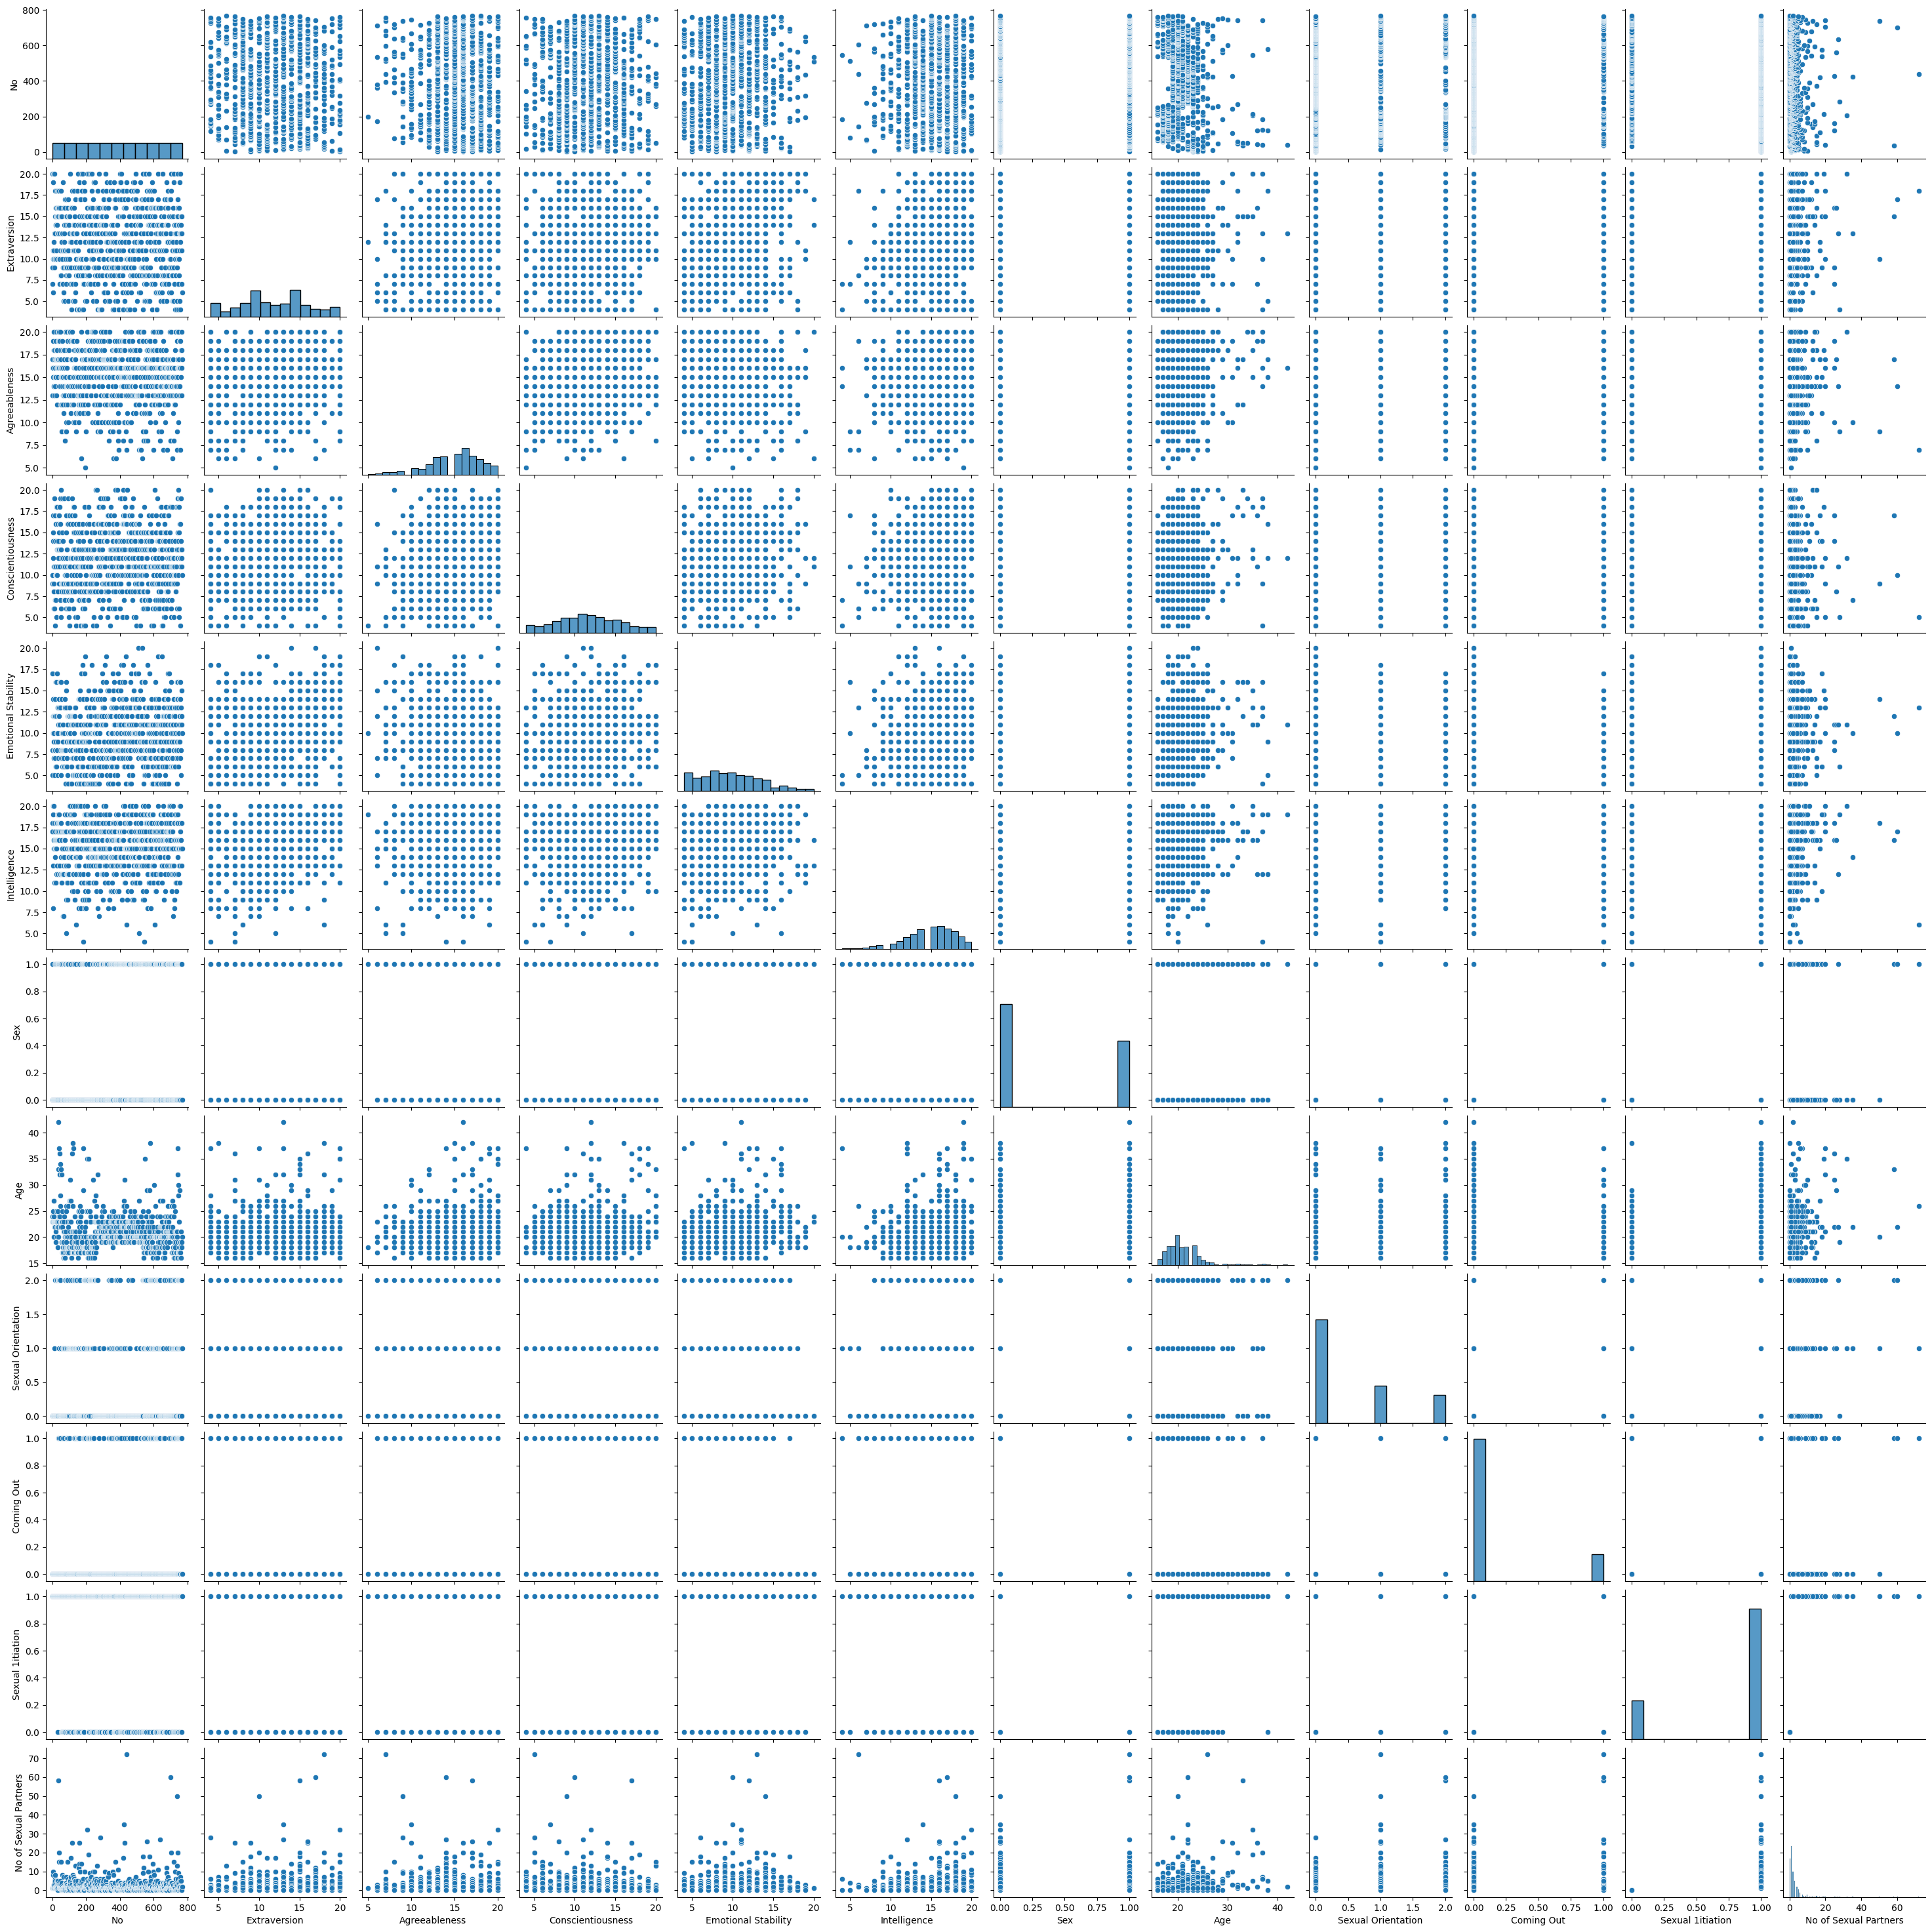

In [14]:
sns.pairplot(statistical_data)

In [15]:
statistical_data.describe()

,No,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Intelligence,Sex,Age,Sexual Orientation,Coming Out,Sexual 1itiation,No of Sexual Partners
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,384.500000,11.830729,14.977865,11.705729,9.824219,14.96875,0.390625,21.057292,0.554688,0.157552,0.772135,2.970052
std,221.846794,4.181351,3.061436,3.682209,3.431822,3.00700,0.488208,3.567468,0.762299,0.364558,0.419728,5.826066
min,1.000000,4.000000,5.000000,4.000000,4.000000,4.00000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,192.750000,9.000000,13.000000,9.000000,7.000000,13.00000,0.000000,19.000000,0.000000,0.000000,1.000000,1.000000
50%,384.500000,12.000000,15.000000,12.000000,10.000000,15.00000,0.000000,20.000000,0.000000,0.000000,1.000000,1.000000
75%,576.250000,15.000000,17.000000,14.000000,12.000000,17.00000,1.000000,23.000000,1.000000,0.000000,1.000000,3.000000
max,768.000000,20.000000,20.000000,20.000000,20.000000,20.00000,1.000000,42.000000,2.000000,1.000000,1.000000,72.000000


In [22]:
# sns.barplot(statistical_data, x="Sexual Orientation", y="Intelligence", hue="sex")

In [26]:
#plot.pair(
#so.Plot(mpg, x="Age")
    #.pair(y=[ 'Extraversion','Agreeableness','Conscientiousness','Emotional Stability','Intelligence',])
    #.facet(col="Sexual Orientation")
    #.add(so.Dots())

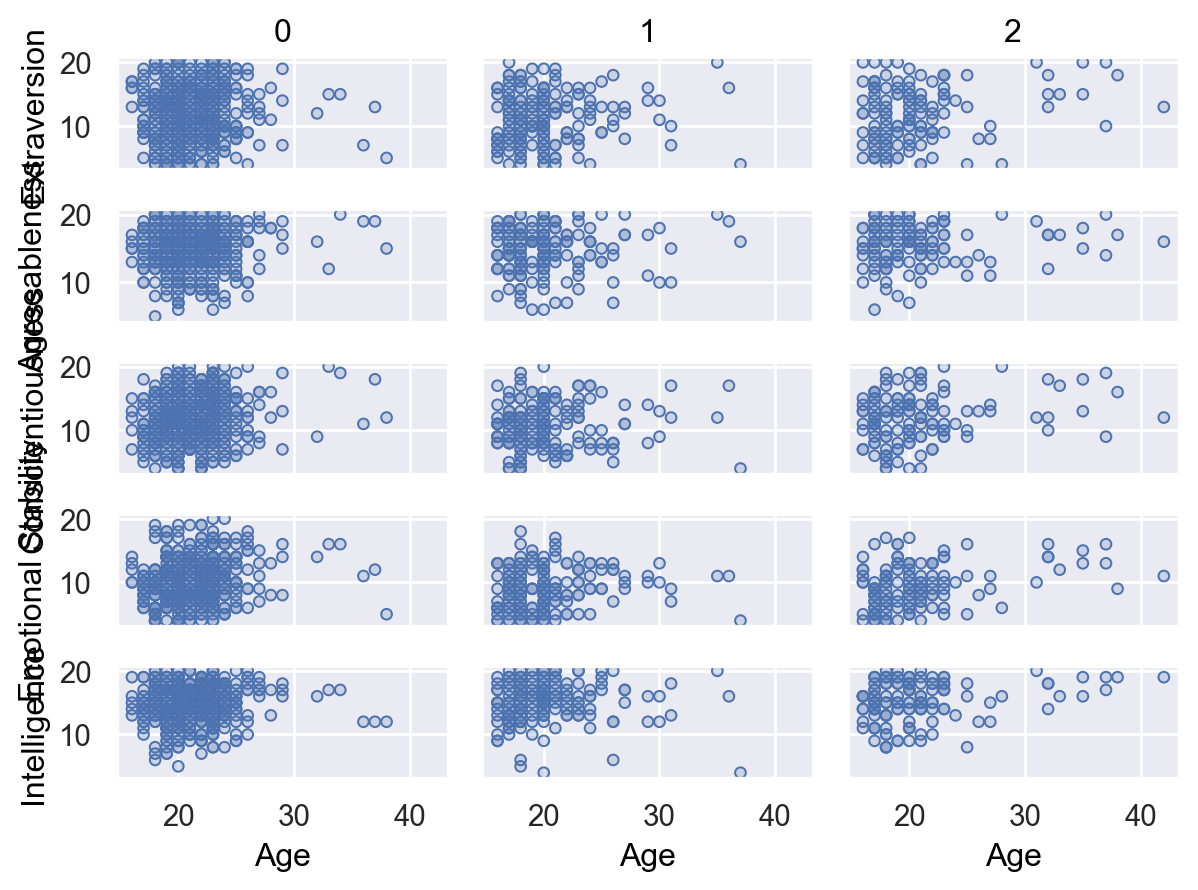

In [35]:
import seaborn.objects as so
so.Plot(data=statistical_data, x="Age")\
    .pair(y=["Extraversion", "Agreeableness", "Conscientiousness", "Emotional Stability", "Intelligence"])\
    .facet(col="Sexual Orientation")\
    .add(so.Dots())

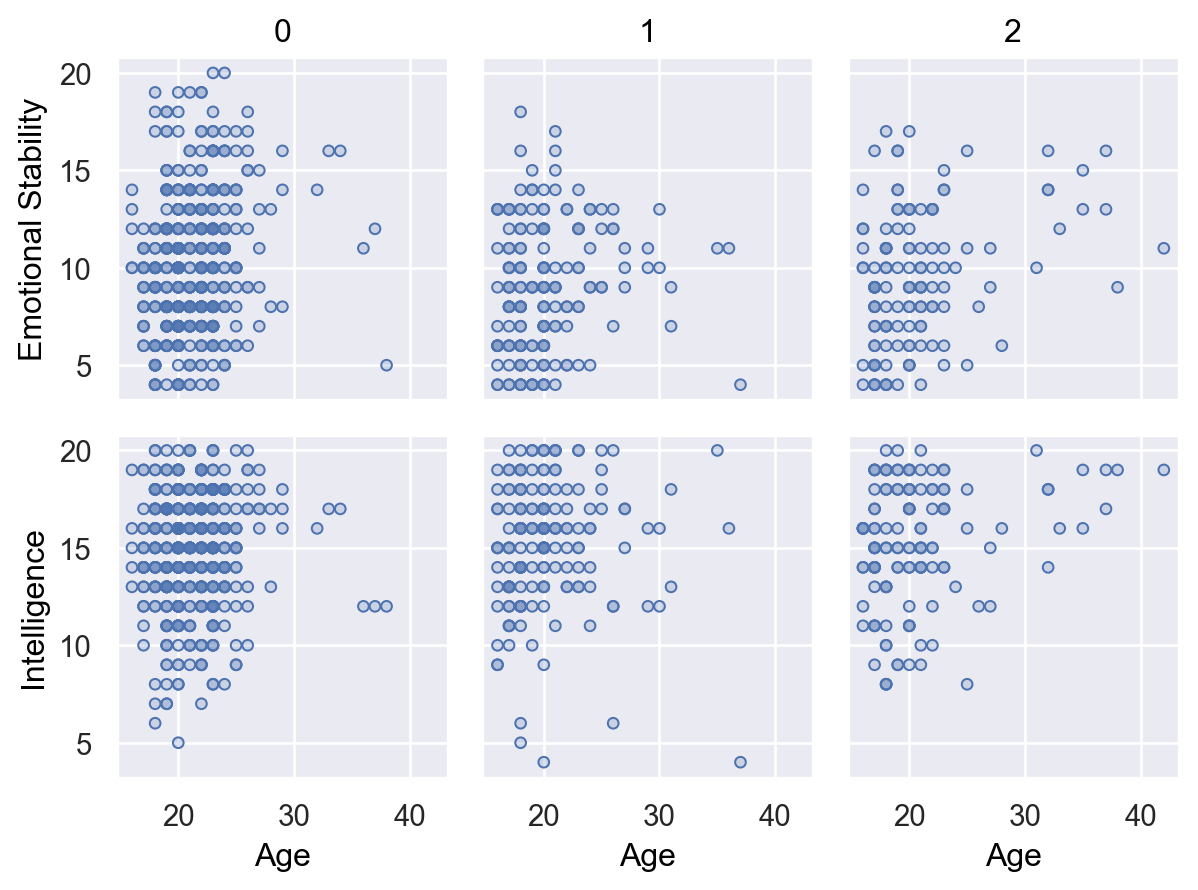

In [36]:
import seaborn.objects as so
so.Plot(data=statistical_data, x="Age")\
    .pair(y=["Emotional Stability", "Intelligence"])\
    .facet(col="Sexual Orientation")\
    .add(so.Dots())

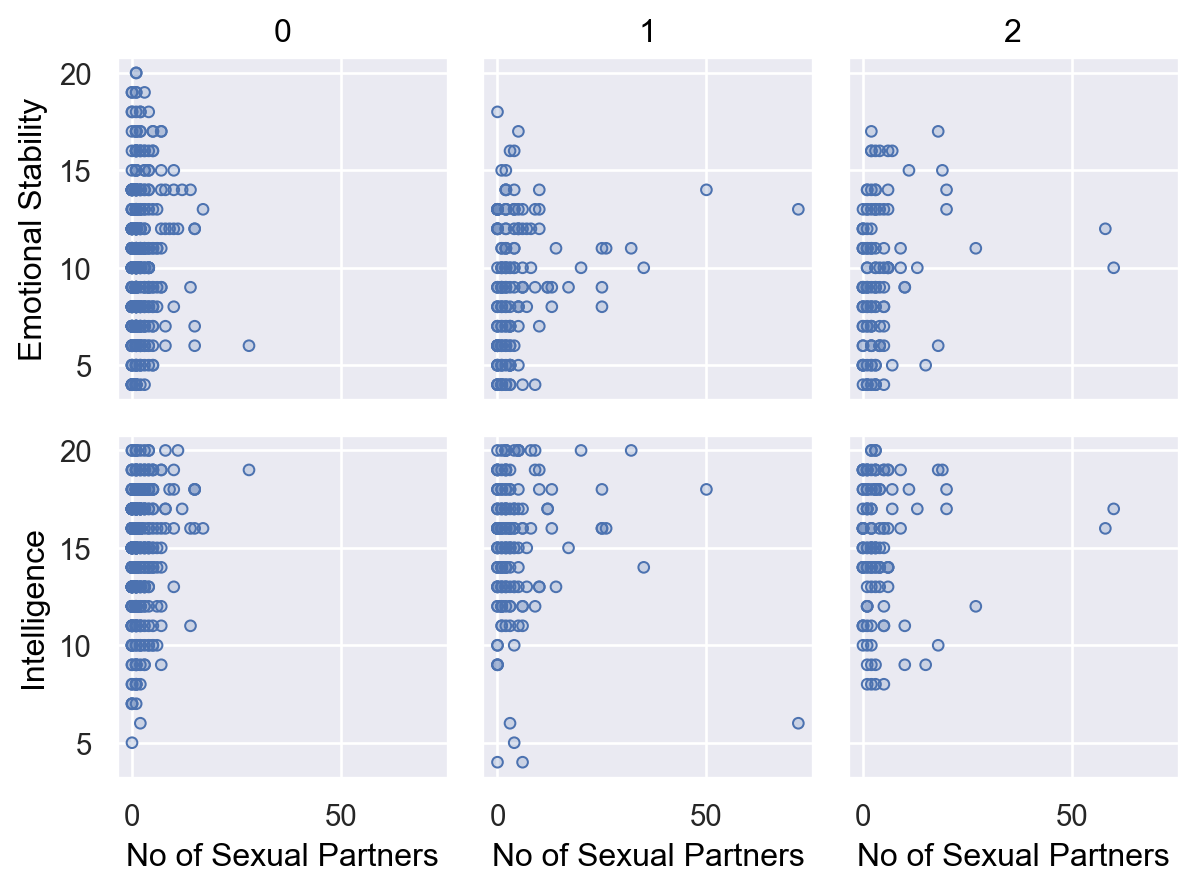

In [37]:
import seaborn.objects as so
so.Plot(data=statistical_data, x="No of Sexual Partners")\
    .pair(y=["Emotional Stability", "Intelligence"])\
    .facet(col="Sexual Orientation")\
    .add(so.Dots())

In [40]:
#statistical_data.groupby(df[['Sexual Orientation','Coming Out']])mean.()
statistical_data.groupby(['Sexual Orientation']).mean()

,No,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Intelligence,Sex,Age,Coming Out,Sexual 1itiation,No of Sexual Partners
Sexual Orientation,,,,,,,,,,,
0,380.082979,12.055319,14.902128,11.957447,10.217021,14.819149,0.402128,21.336170,0.012766,0.759574,1.993617
1,384.641176,11.205882,14.770588,10.817647,9.029412,15.194118,0.217647,20.341176,0.382353,0.770588,4.529412
2,400.531250,11.835938,15.531250,11.960938,9.437500,15.218750,0.578125,20.984375,0.390625,0.820312,4.484375


In [43]:
statistical_data.groupby(['Sex','Sexual Orientation']).mean()

No  Extraversion  Agreeableness  \
Sex Sexual Orientation                                            
0   0                   352.266904     12.177936      15.412811   
    1                   351.353383     11.112782      14.887218   
    2                   290.259259     11.703704      16.277778   
1   0                   421.439153     11.873016      14.142857   
    1                   504.297297     11.540541      14.351351   
    2                   481.000000     11.932432      14.986486   

                        Conscientiousness  Emotional Stability  Intelligence  \
Sex Sexual Orientation                                                         
0   0                           11.832740             9.423488     14.822064   
    1                           10.669173             8.714286     15.270677   
    2                           11.333333             8.722222     14.925926   
1   0                           12.142857            11.396825     14.814815   
    1                           11.351351            10.162162     14.918919   
    2                           12.418919             9.959459     15.432432   

                              Age  Coming Out  Sexual 1itiation  \
Sex Sexual Orientation                                            
0   0                   21.327402    0.007117          0.811388   
    1                   20.466165    0.315789          0.812030   
    2                   19.703704    0.296296          0.888889   
1   0                   21.349206    0.021164          0.682540   
    1                   19.891892    0.621622          0.621622   
    2                   21.918919    0.459459          0.770270   

                        No of Sexual Partners  
Sex Sexual Orientation                         
0   0                                2.049822  
    1                                4.616541  
    2                                3.481481  
1   0                                1.910053  
    1                                4.216216  
    2                                5.216216